In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
def read_file(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        type_info = lines[0].split(",")[0]
        memories = [float(line.strip()) for line in lines[1:]]
        return type_info, memories

In [3]:
res_df = pd.DataFrame(columns=["runtime", "memory_kiB"])

In [4]:
result_files = glob.glob("../../memory/memory-io.containerd*")

for result_file in result_files:
    type_info, memories = read_file(result_file)
    res_df = pd.concat([res_df, pd.DataFrame({"runtime": type_info, "memory_kiB": memories})], ignore_index=True)

res_df

/tmp/ipykernel_812934/948869515.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_df = pd.concat([res_df, pd.DataFrame({"runtime": type_info, "memory_kiB": memories})], ignore_index=True)


,runtime,memory_kiB
0,io.containerd.kata.v2-kata3-dragonball,120295.04
1,io.containerd.kata.v2-kata3-dragonball,120094.48
2,io.containerd.kata.v2-kata3-dragonball,120176.00
3,io.containerd.kata.v2-kata3-dragonball,120161.20
4,io.containerd.kata.v2-kata3-dragonball,119993.12
...,...,...
85,io.containerd.kata.v2-kata3-qemu,139614.40
86,io.containerd.kata.v2-kata2-firecracker,142943.84
87,io.containerd.kata.v2-kata2-firecracker,142579.04
88,io.containerd.kata.v2-kata2-firecracker,141583.20


In [5]:
res_df.describe()

,memory_kiB
count,90.000000
mean,97831.380444
std,53052.518597
min,5191.440000
25%,52260.000000
50%,120121.000000
75%,139359.660000
max,157152.240000


In [6]:
res_df["memory_MiB"] = res_df["memory_kiB"] / 1024
res_df["memory_GiB"] = res_df["memory_MiB"] / 1024

res_df.sort_values(by="memory_kiB", ascending=False)

,runtime,memory_kiB,memory_MiB,memory_GiB
53,io.containerd.kata.v2-kata2-qemu,157152.24,153.468984,0.149872
52,io.containerd.kata.v2-kata2-qemu,157031.84,153.351406,0.149757
54,io.containerd.kata.v2-kata2-qemu,157006.56,153.326719,0.149733
55,io.containerd.kata.v2-kata2-qemu,156990.40,153.310937,0.149718
48,io.containerd.kata.v2-kata2-qemu,156928.00,153.250000,0.149658
...,...,...,...,...
69,io.containerd.runc.v2,5439.12,5.311641,0.005187
70,io.containerd.runc.v2,5403.52,5.276875,0.005153
72,io.containerd.runc.v2,5394.80,5.268359,0.005145
68,io.containerd.runc.v2,5347.44,5.222109,0.005100


In [7]:
average_memory_per_type = res_df.groupby("runtime")["memory_MiB"].mean().reset_index().sort_values(by="memory_MiB")
median_memory_per_type = res_df.groupby("runtime")["memory_MiB"].median().reset_index().sort_values(by="memory_MiB")
min_memory_per_type = res_df.groupby("runtime")["memory_MiB"].min().reset_index().sort_values(by="memory_MiB")
max_memory_per_type = res_df.groupby("runtime")["memory_MiB"].max().reset_index().sort_values(by="memory_MiB")
std_memory_per_type = res_df.groupby("runtime")["memory_MiB"].std().reset_index().sort_values(by="memory_MiB")

print("average_memory_per_type:\n", average_memory_per_type)
print("\n\nmedian_memory_per_type :\n", median_memory_per_type)
print("\n\nmin_memory_per_type    :\n", min_memory_per_type)
print("\n\nmax_memory_per_type    :\n", max_memory_per_type)
print("\n\nstd_memory_per_type    :\n", std_memory_per_type)

average_memory_per_type:
                                        runtime  memory_MiB
6                        io.containerd.runc.v2    5.329453
8               io.containerd.runsc.v1-systrap   22.025898
7                   io.containerd.runsc.v1-kvm   51.167227
3  io.containerd.kata.v2-kata3-cloudhypervisor  111.964812
4       io.containerd.kata.v2-kata3-dragonball  117.278055
0  io.containerd.kata.v2-kata2-cloudhypervisor  124.632898
5             io.containerd.kata.v2-kata3-qemu  135.939461
1      io.containerd.kata.v2-kata2-firecracker  138.235508
2             io.containerd.kata.v2-kata2-qemu  153.272805


median_memory_per_type :
                                        runtime  memory_MiB
6                        io.containerd.runc.v2    5.329258
8               io.containerd.runsc.v1-systrap   22.013594
7                   io.containerd.runsc.v1-kvm   51.163320
3  io.containerd.kata.v2-kata3-cloudhypervisor  111.908555
4       io.containerd.kata.v2-kata3-dragonball  117.305664
0 

In [8]:
res_df["friendly_runtime"] = res_df["runtime"] \
    .str.replace("io.containerd.runc.v2",                       "runc") \
    .str.replace("io.containerd.kata.v2-kata2-qemu",            "Kata (2.x, QEMU)") \
    .str.replace("io.containerd.kata.v2-kata3-qemu",            "Kata (3.x, QEMU)") \
    .str.replace("io.containerd.kata.v2-kata2-cloudhypervisor", "Kata (2.x, Cloud Hypervisor)") \
    .str.replace("io.containerd.kata.v2-kata3-cloudhypervisor", "Kata (3.x, Cloud Hypervisor)") \
    .str.replace("io.containerd.kata.v2-kata2-firecracker",     "Kata (2.x, Firecracker)") \
    .str.replace("io.containerd.kata.v2-kata3-dragonball",      "Kata (3.x, Dragonball)") \
    .str.replace("io.containerd.runsc.v1-kvm",                  "gVisor (KVM)") \
    .str.replace("io.containerd.runsc.v1-systrap",              "gVisor (systrap)")

res_df

,runtime,memory_kiB,memory_MiB,memory_GiB,friendly_runtime
0,io.containerd.kata.v2-kata3-dragonball,120295.04,117.475625,0.114722,"Kata (3.x, Dragonball)"
1,io.containerd.kata.v2-kata3-dragonball,120094.48,117.279766,0.114531,"Kata (3.x, Dragonball)"
2,io.containerd.kata.v2-kata3-dragonball,120176.00,117.359375,0.114609,"Kata (3.x, Dragonball)"
3,io.containerd.kata.v2-kata3-dragonball,120161.20,117.344922,0.114595,"Kata (3.x, Dragonball)"
4,io.containerd.kata.v2-kata3-dragonball,119993.12,117.180781,0.114434,"Kata (3.x, Dragonball)"
...,...,...,...,...,...
85,io.containerd.kata.v2-kata3-qemu,139614.40,136.342187,0.133147,"Kata (3.x, QEMU)"
86,io.containerd.kata.v2-kata2-firecracker,142943.84,139.593594,0.136322,"Kata (2.x, Firecracker)"
87,io.containerd.kata.v2-kata2-firecracker,142579.04,139.237344,0.135974,"Kata (2.x, Firecracker)"
88,io.containerd.kata.v2-kata2-firecracker,141583.20,138.264844,0.135024,"Kata (2.x, Firecracker)"


[Text(0.5, 0, 'Memory usage (MiB)'), Text(0, 0.5, '')]

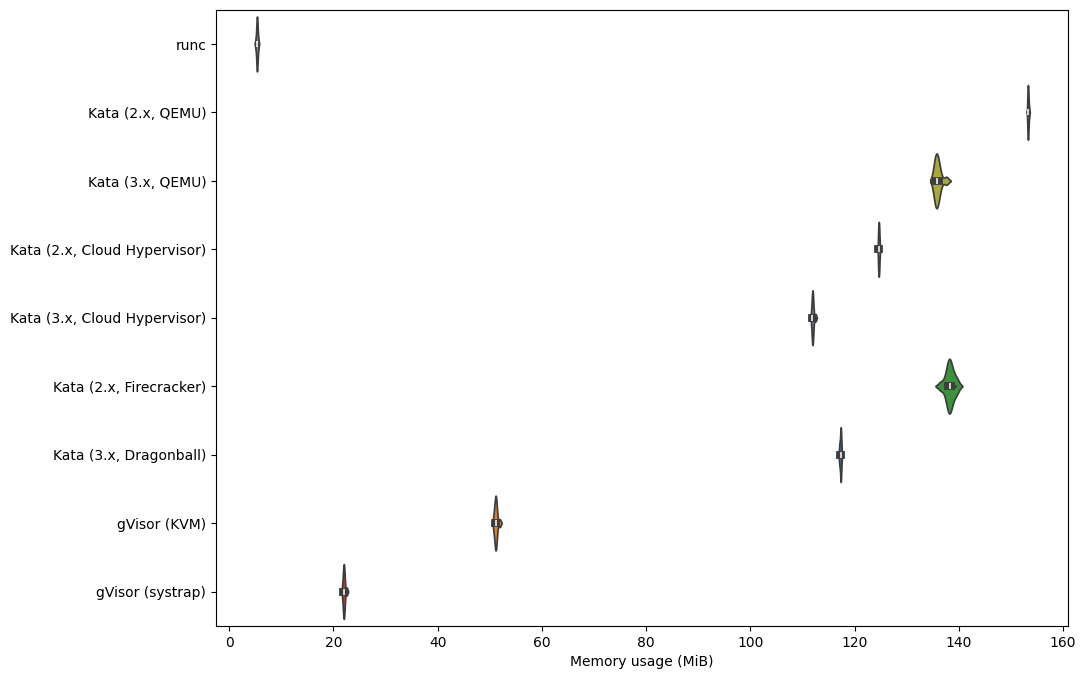

In [9]:
plt.figure(figsize=(11, 8))
ax = sns.violinplot(data=res_df, hue="friendly_runtime", x="memory_MiB", y="friendly_runtime", inner="box", order=[
    "runc",
    "Kata (2.x, QEMU)",
    "Kata (3.x, QEMU)",
    "Kata (2.x, Cloud Hypervisor)",
    "Kata (3.x, Cloud Hypervisor)",
    "Kata (2.x, Firecracker)",
    "Kata (3.x, Dragonball)",
    "gVisor (KVM)",
    "gVisor (systrap)",
])
ax.set(xlabel="Memory usage (MiB)", ylabel="")

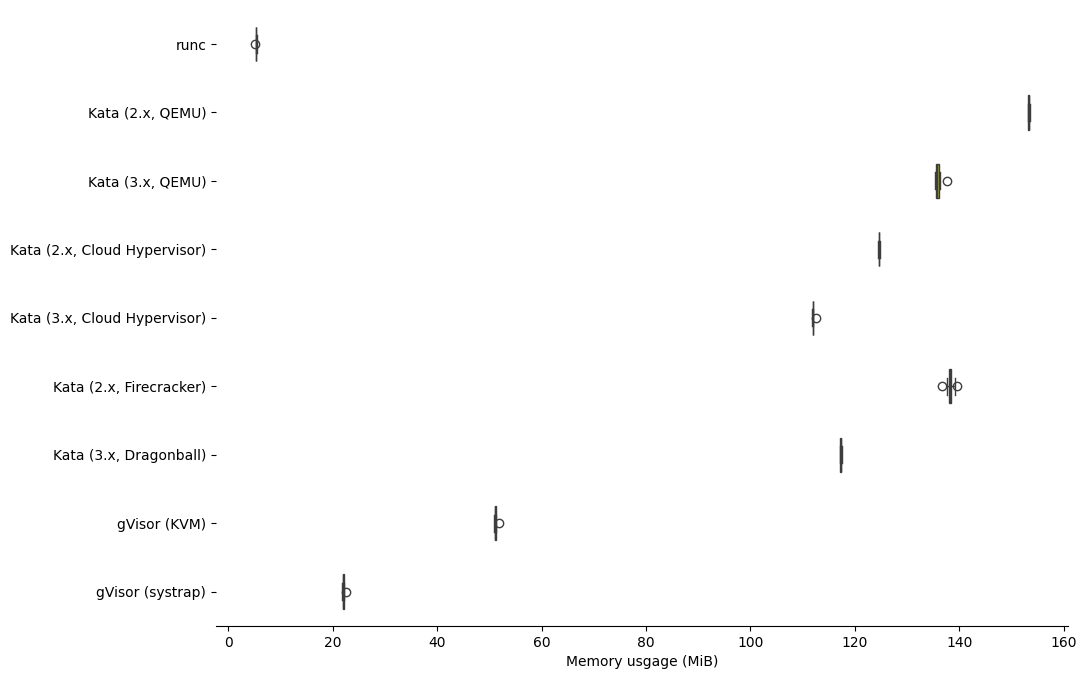

In [10]:
plt.figure(figsize=(11, 8))
ax = sns.boxplot(data=res_df, x="memory_MiB", y="friendly_runtime", hue="friendly_runtime", width=0.5, order=[
    "runc",
    "Kata (2.x, QEMU)",
    "Kata (3.x, QEMU)",
    "Kata (2.x, Cloud Hypervisor)",
    "Kata (3.x, Cloud Hypervisor)",
    "Kata (2.x, Firecracker)",
    "Kata (3.x, Dragonball)",
    "gVisor (KVM)",
    "gVisor (systrap)",
])
# sns.stripplot(data=res_df, x="time", y="runtime", size=3, color=".4")

ax.set(xlabel="Memory usgage (MiB)", ylabel="")
sns.despine(left=True)

In [11]:
# Compare kata versions and hypervisors

kata_df = res_df.loc[res_df["runtime"].str.contains("kata")].reset_index(drop=True)
kata_df["architecture"] = kata_df["runtime"].apply(lambda runtime: "2.x (Go)" if "kata2" in runtime else "3.x (Rust)")
kata_df["hypervisor"] = kata_df["runtime"].apply(lambda runtime: ("QEMU" if "qemu" in runtime else ("Firecracker" if "firecracker" in runtime else ("Dragonball" if "dragonball" in runtime else "Cloud Hypervisor")))
)
kata_df["runtime"] = "io.containerd.kata.v2"
kata_df

,runtime,memory_kiB,memory_MiB,memory_GiB,friendly_runtime,architecture,hypervisor
0,io.containerd.kata.v2,120295.04,117.475625,0.114722,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
1,io.containerd.kata.v2,120094.48,117.279766,0.114531,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
2,io.containerd.kata.v2,120176.00,117.359375,0.114609,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
3,io.containerd.kata.v2,120161.20,117.344922,0.114595,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
4,io.containerd.kata.v2,119993.12,117.180781,0.114434,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
5,io.containerd.kata.v2,120133.20,117.317578,0.114568,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
6,io.containerd.kata.v2,119865.28,117.055937,0.114312,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
7,io.containerd.kata.v2,119917.44,117.106875,0.114362,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
8,io.containerd.kata.v2,120108.80,117.293750,0.114545,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball
9,io.containerd.kata.v2,120182.72,117.365938,0.114615,"Kata (3.x, Dragonball)",3.x (Rust),Dragonball


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


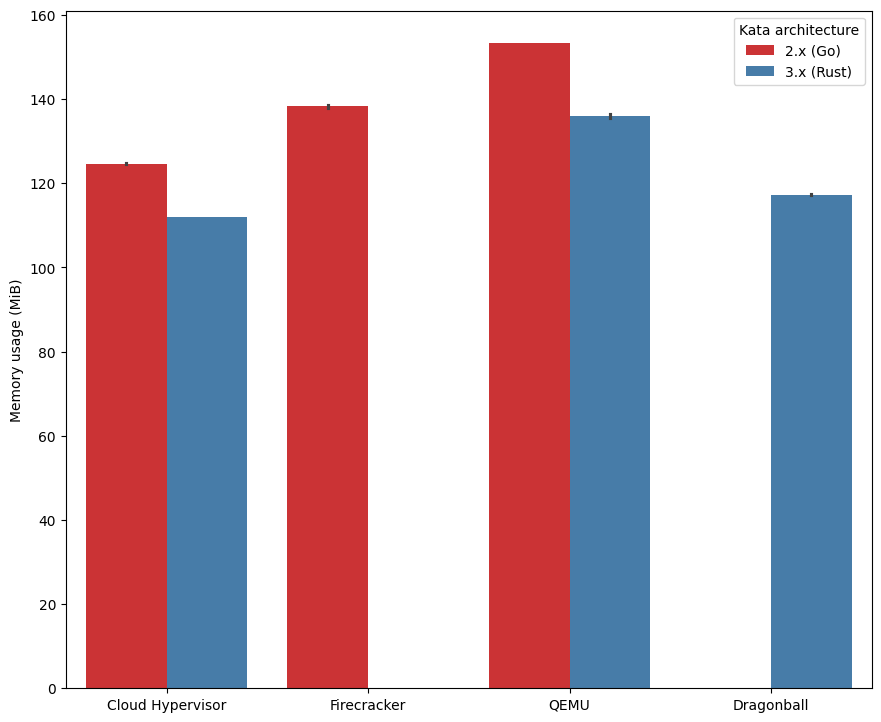

In [12]:
plt.figure(figsize=(10.4, 8.8))

ax = sns.barplot(data=kata_df, x="hypervisor", y="memory_MiB", hue="architecture", palette="Set1", hue_order=["2.x (Go)", "3.x (Rust)"], order=[
    "Cloud Hypervisor",
    "Firecracker",
    "QEMU",
    "Dragonball"
])

ax.set(ylabel="Memory usage (MiB)", xlabel="")
ax.legend_.set_title("Kata architecture")

plt.savefig("memory-kata_hypervisors_architecture.eps", format="eps", dpi=1200, bbox_inches="tight")

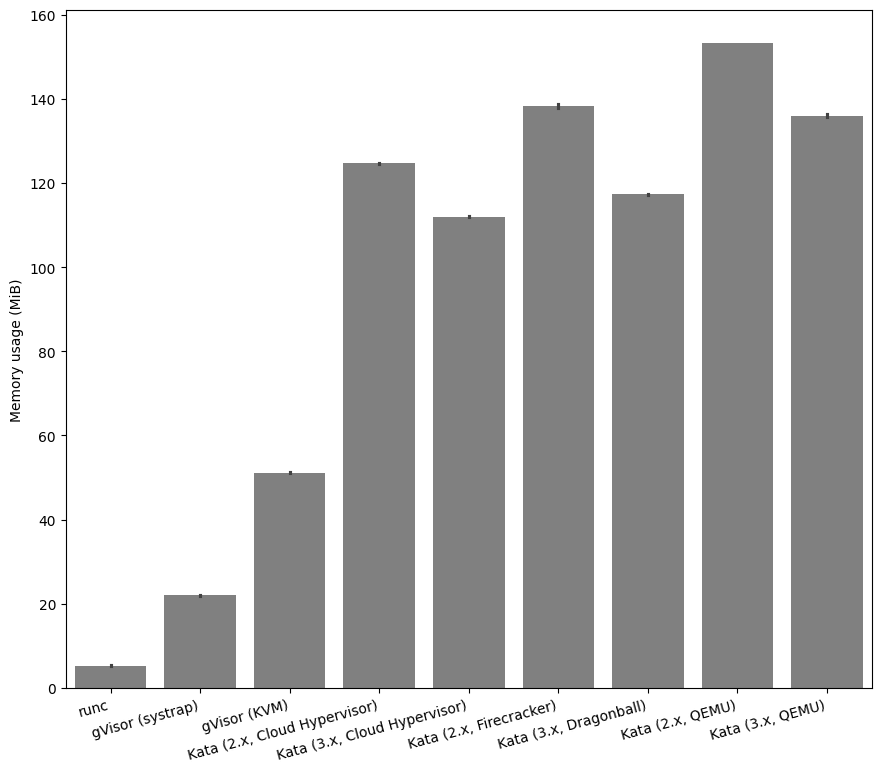

In [13]:
plt.figure(figsize=(10.4, 8.8))

ax = sns.barplot(data=res_df, x="friendly_runtime", y="memory_MiB", color="gray", order=[
    "runc",
    "gVisor (systrap)",
    "gVisor (KVM)",
    "Kata (2.x, Cloud Hypervisor)",
    "Kata (3.x, Cloud Hypervisor)",
    "Kata (2.x, Firecracker)",
    "Kata (3.x, Dragonball)",
    "Kata (2.x, QEMU)",
    "Kata (3.x, QEMU)",
])

plt.xticks(rotation=15, horizontalalignment="right")
ax.set(xlabel="", ylabel="Memory usage (MiB)")

plt.savefig("memory-bar_overview.eps", format="eps", dpi=1200, bbox_inches="tight")